In [2]:
%run "C:/s/s.py"

In [4]:
df = pd.read_csv('fake_reg.csv')

In [8]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


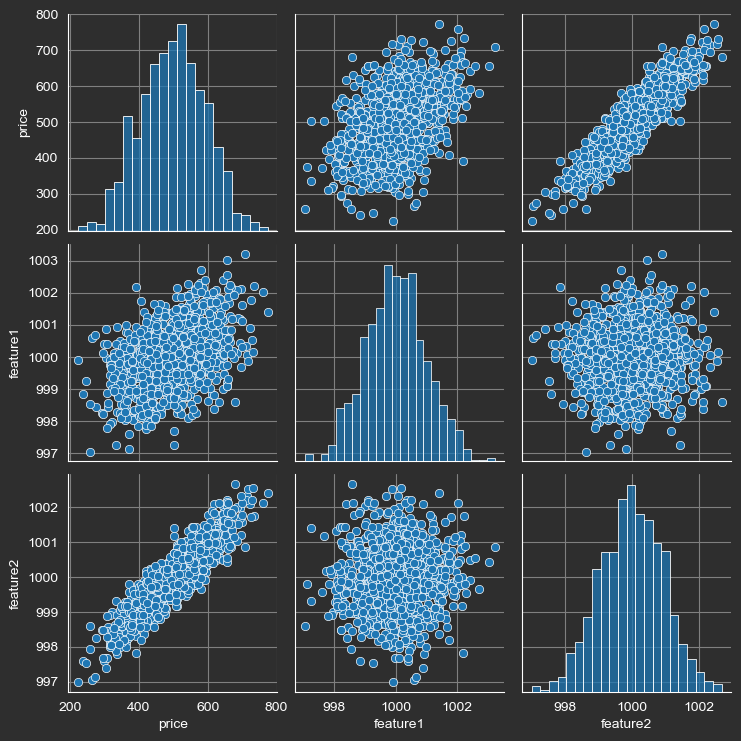

In [10]:
sns.pairplot(df)

In [24]:
x=df[['feature1','feature2']].values
y=df['price'].values

In [30]:
xt,xs,yt,ys = tts(x,y,test_size=0.3,random_state=42)

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  `MinMaxScaler` doesn't reduce the effect of outliers, but it linearly
 |  scales them down into a fixed range, where the largest occurring data point
 |  corresponds to the maximum value and the smallest one 

In [38]:
s = MinMaxScaler()

In [40]:
s.fit(xt)

MinMaxScaler()

In [42]:
xt = s.transform(xt)

In [44]:
xt

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [46]:
xs = s.transform(xs)

0.0

In [60]:
from tensorflow.keras.models import Sequential

In [102]:
from tensorflow.keras.layers import Dense

In [84]:
m = Sequential([Dense(4,activation='relu'),
               Dense(2,activation='relu'),
               Dense(1)])

In [2]:
m = Sequential()

m.add(Dense(6,activation='relu'))
m.add(Dense(2,activation='relu'))
m.add(Dense(5,activation='relu'))
m.add(Dense(2,activation='relu'))
m.add(Dense(4,activation='relu'))
m.add(Dense(2,activation='relu'))
m.add(Dense(1,))

m.compile(optimizer='adam',loss='mse')

SyntaxError: incomplete input (2959927976.py, line 1)

In [234]:
m.fit(xt,yt,epochs=300)

Epoch 1/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 252002.0312 
Epoch 2/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 256633.2812 
Epoch 3/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 256074.5938 
Epoch 4/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 262230.0312 
Epoch 5/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 255655.8906 
Epoch 6/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 255291.5781 
Epoch 7/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 251881.0469 
Epoch 8/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 255727.3750  
Epoch 9/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 250366.4844 
Epoch 10/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 250656.5781 
Epoch 11/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 247912.1094 
Epoch 12/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 247065.6875 
Epoch 13/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 230888.9531 
Epoch 14/300
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss:

In [197]:
r = pd.DataFrame(m.history.history)

<Axes: >

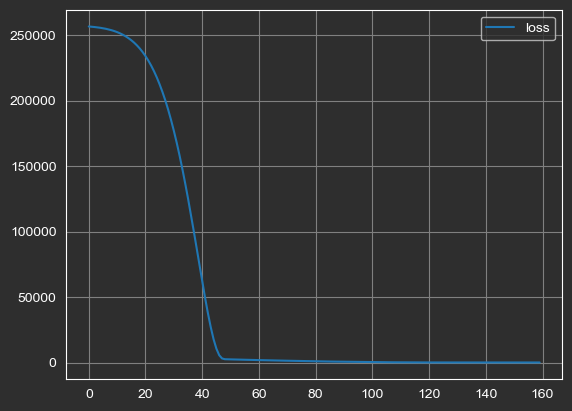

In [199]:
r.plot()

In [294]:
w = Sequential()

w.add(Dense(6,activation='relu'))
w.add(Dense(2,activation='relu'))
w.add(Dense(5,activation='relu'))
w.add(Dense(2,activation='relu'))
w.add(Dense(4,activation='relu'))
w.add(Dense(2,activation='relu'))
w.add(Dense(1,))

w.compile(optimizer='rmsprop',loss='mse')

w.fit(xt,yt,epochs=100)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 256254.4844
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 256691.9688 
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 254878.4219 
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 260487.4062 
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 259456.4531 
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 256702.0469 
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 256972.4844 
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 256763.1406 
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 257481.9688
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 250639.8594
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 254095.0000
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 249627.2656
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 251125.7500
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 245694

In [296]:
w.fit(xt,yt,epochs=100)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 160.1226 
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 138.1814 
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 135.3148 
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 116.7709 
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 117.5272 
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 90.0974 
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 88.5930 
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 76.2768 
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 63.4276 
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 65.5047
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 51.8715 
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 50.4884 
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 46.1157 
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 44.7499 
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━

In [298]:
e = pd.DataFrame(w.history.history)

<Axes: >

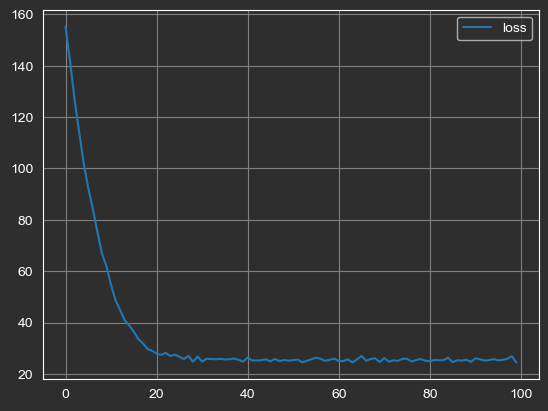

In [300]:
e.plot()

In [238]:
m.evaluate(xs,ys,verbose=0)

24.92398452758789

In [302]:
w.evaluate(xt,yt,verbose=0)

29.424442291259766

In [286]:
w.predict(xs)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.307268],
       [3.30

In [240]:
p = m.predict(xs)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [242]:
p

array([[405.1782 ],
       [623.439  ],
       [592.0277 ],
       [572.12756],
       [366.5117 ],
       [579.0779 ],
       [514.95496],
       [458.99557],
       [549.14514],
       [447.40652],
       [611.6846 ],
       [548.8331 ],
       [418.98984],
       [408.76053],
       [651.134  ],
       [437.18713],
       [508.33908],
       [659.8402 ],
       [662.4882 ],
       [565.4308 ],
       [334.11713],
       [444.72507],
       [382.4172 ],
       [378.64194],
       [566.4926 ],
       [610.49567],
       [532.2872 ],
       [427.74933],
       [655.3506 ],
       [413.96735],
       [442.5235 ],
       [485.02066],
       [438.30417],
       [681.7548 ],
       [424.64206],
       [417.5792 ],
       [501.81198],
       [550.3708 ],
       [509.63406],
       [395.2535 ],
       [618.4889 ],
       [416.51526],
       [604.34674],
       [445.84485],
       [501.88297],
       [581.60443],
       [668.8964 ],
       [490.29272],
       [318.45963],
       [485.321  ],


In [248]:
p = pd.Series(p.reshape(300,))

In [250]:
p

0      405.178192
1      623.439026
2      592.027710
3      572.127563
4      366.511688
          ...    
295    528.943542
296    515.099304
297    609.549316
298    416.840088
299    410.767822
Length: 300, dtype: float32

In [256]:
pf = pd.DataFrame(ys,columns=['True Y'])

In [260]:
pf= pd.concat([pf,p],axis=1)

In [264]:
pf.columns = ['Y','P']

In [266]:
pf

,Y,P
0,402.296319,405.178192
1,624.156198,623.439026
2,582.455066,592.027710
3,578.588606,572.127563
4,371.224104,366.511688
...,...,...
295,525.704657,528.943542
296,502.909473,515.099304
297,612.727910,609.549316
298,417.569725,416.840088


<Axes: xlabel='Y', ylabel='P'>

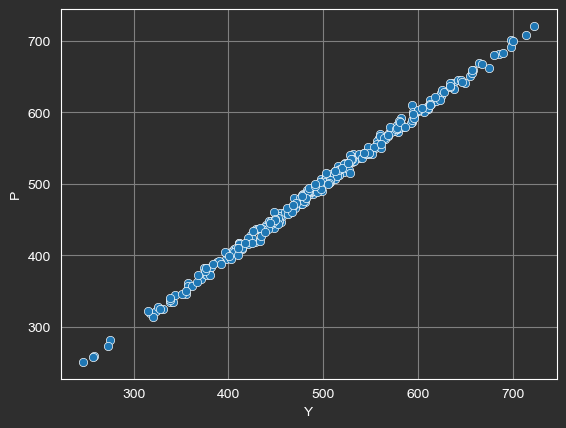

In [268]:
sns.scatterplot(x='Y',y='P',data=pf)

In [270]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [274]:
mean_squared_error(pf['Y'],pf['P'])

24.9239876432209

In [272]:
mean_absolute_error(pf['Y'],pf['P'])

3.998189849046146

In [304]:
mean_squared_error(pf['Y'],pf['P'])**0.5

4.992392977643177

In [276]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [306]:
ng = [[988,1000]]

In [308]:
ng = s.transform(ng)

In [312]:
q = m.predict(ng)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [314]:
q

array([[33.296814]], dtype=float32)

In [348]:
from tensorflow.keras.models import load_model

In [382]:
m.save('My First model.keras')
lm = load_model("My First model.keras",compile=False)
lm.compile(optimizer='adam', loss='mean_squared_error')

In [384]:
lm.predict(ng)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


array([[33.296814]], dtype=float32)

In [374]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [386]:
lm.fit(xt,yt,epochs=50)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 26.8847
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.4252 
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.1184 
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.6492 
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.7082 
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.2252 
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.7430 
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.5569 
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.4269 
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.0089 
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.5289 
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.4067 
Epoch 13/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.8856 
Epoch 14/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.9528 
Epoch 15/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: